In [1]:
import json
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from ultralytics import YOLO

In [13]:
import os
import shutil

# Define the directories
label_directory = '/media/avalocal/T9/harsha/datasets/data_copy/labels/test'
image_directory = '/media/avalocal/T9/harsha/datasets/data_copy/images/test'
output_base_directory = '/media/avalocal/T9/harsha/datasets/speed_limit_data/test'

# Define the output subdirectories
output_image_directory = os.path.join(output_base_directory, 'images')
output_label_directory = os.path.join(output_base_directory, 'labels')

# Define the set of first entries to filter out
filter_set = {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}

# Create the output directories if they don't exist
os.makedirs(output_image_directory, exist_ok=True)
os.makedirs(output_label_directory, exist_ok=True)

def filter_files(label_directory, filter_set):
    image_files_to_filter = []
    label_files_to_filter = []
    
    for filename in os.listdir(label_directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(label_directory, filename)
            with open(filepath, 'r') as file:
                lines = file.readlines()
                # Check each line in the file
                for line in lines:
                    first_entry = int(line.split()[0])
                    if first_entry in filter_set:
                        image_filename = filename.replace('.txt', '.jpg')
                        image_files_to_filter.append(image_filename)
                        label_files_to_filter.append(filename)
                        break

    return image_files_to_filter, label_files_to_filter

def copy_filtered_files(files_to_filter, source_directory, output_directory):
    for file in files_to_filter:
        src_path = os.path.join(source_directory, file)
        dst_path = os.path.join(output_directory, file)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
            print(f"Copied {file} to {output_directory}")
        else:
            print(f"File {file} does not exist in {source_directory}")

# Run the filtering function and get the list of image and label files to filter
image_files_to_filter, label_files_to_filter = filter_files(label_directory, filter_set)

# Copy the filtered image files to the new image directory
copy_filtered_files(image_files_to_filter, image_directory, output_image_directory)

# Copy the filtered label files to the new label directory
copy_filtered_files(label_files_to_filter, label_directory, output_label_directory)

# Print the list of copied image and label files
print("Filtered and copied image files:", image_files_to_filter)
print("Filtered and copied label files:", label_files_to_filter)


Copied speed_limit_55_130_jpg.rf.0f093dae3308963315f213ffc3d8961d.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
Copied speed_limit_35_117_jpg.rf.f2640b9b59d089e97dd1c2061c340c52.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
File 898.jpg does not exist in /media/avalocal/T9/harsha/datasets/data_copy/images/test
Copied speed_limit_70_280_jpg.rf.c4817b92fee40108f31fa1261fffd606.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
Copied 5fff868a8f052-image_jpg.rf.4061b1de6d3bde326a5436d19c900175.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
Copied speed_limit_75_304_jpg.rf.31f9fa0ae7ea80db64d036a82d375000.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
Copied images547_jpg.rf.2ae142e3060277bd63662a170e9978cf.jpg to /media/avalocal/T9/harsha/datasets/speed_limit_data/test/images
File 959.jpg does not exist in /media/avalocal/T9/harsha/datasets/data_copy/images/test
Copied spe

In [15]:
import os
import shutil
import random

# Define the source and destination directories
source_directory = '/media/avalocal/T9/harsha/datasets/speed_limit_data'
destination_directory = '/media/avalocal/T9/harsha/datasets/speed_limit_data_mini'

# Number of samples to copy
train_samples = 5000
val_samples = 2000

# Create the destination directory and its subdirectories if they don't exist
os.makedirs(destination_directory, exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(destination_directory, 'val/labels'), exist_ok=True)

def copy_samples(source_images_dir, source_labels_dir, dest_images_dir, dest_labels_dir, num_samples):
    image_files = os.listdir(source_images_dir)
    image_files = [f for f in image_files if f.endswith('.jpg')]
    
    # Randomly sample the required number of images
    sampled_images = random.sample(image_files, num_samples)
    
    for image_file in sampled_images:
        # Define source and destination paths for images
        src_image_path = os.path.join(source_images_dir, image_file)
        dst_image_path = os.path.join(dest_images_dir, image_file)
        
        # Copy image file
        shutil.copy(src_image_path, dst_image_path)
        
        # Define source and destination paths for corresponding label files
        label_file = image_file.replace('.jpg', '.txt')
        src_label_path = os.path.join(source_labels_dir, label_file)
        dst_label_path = os.path.join(dest_labels_dir, label_file)
        
        # Copy label file
        shutil.copy(src_label_path, dst_label_path)
        
        print(f"Copied {image_file} and {label_file} to {dest_images_dir} and {dest_labels_dir}")

# Copy samples from train set
copy_samples(
    source_images_dir=os.path.join(source_directory, 'train/images'),
    source_labels_dir=os.path.join(source_directory, 'train/labels'),
    dest_images_dir=os.path.join(destination_directory, 'train/images'),
    dest_labels_dir=os.path.join(destination_directory, 'train/labels'),
    num_samples=train_samples
)

# Copy samples from val set
copy_samples(
    source_images_dir=os.path.join(source_directory, 'val/images'),
    source_labels_dir=os.path.join(source_directory, 'val/labels'),
    dest_images_dir=os.path.join(destination_directory, 'val/images'),
    dest_labels_dir=os.path.join(destination_directory, 'val/labels'),
    num_samples=val_samples
)

print("Sampling and copying complete.")


Copied speed_limit_55_256_jpg.rf.1d4cfc77e526f545733e206805eb4d6f.jpg and speed_limit_55_256_jpg.rf.1d4cfc77e526f545733e206805eb4d6f.txt to /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/images and /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/labels
Copied speed_limit_65_568_jpg.rf.baef62056b51c0faf75ebd3df27e47bf.jpg and speed_limit_65_568_jpg.rf.baef62056b51c0faf75ebd3df27e47bf.txt to /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/images and /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/labels
Copied speed_limit_45_253_jpg.rf.bf42784b5f00f17e643e3ac916b717d5.jpg and speed_limit_45_253_jpg.rf.bf42784b5f00f17e643e3ac916b717d5.txt to /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/images and /media/avalocal/T9/harsha/datasets/speed_limit_data_mini/train/labels
Copied speed_limit_55_215_jpg.rf.97e165ee94638eadd9d56e6893a7b8f5.jpg and speed_limit_55_215_jpg.rf.97e165ee94638eadd9d56e6893a7b8f5.txt to /media/a


0: 640x416 1 speed sign, 112.2ms
Speed: 3.7ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 416)


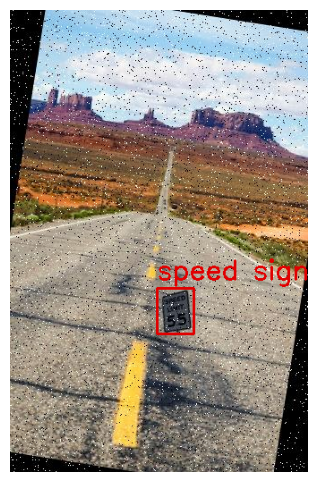


0: 384x640 1 speed sign, 109.8ms
Speed: 0.9ms preprocess, 109.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


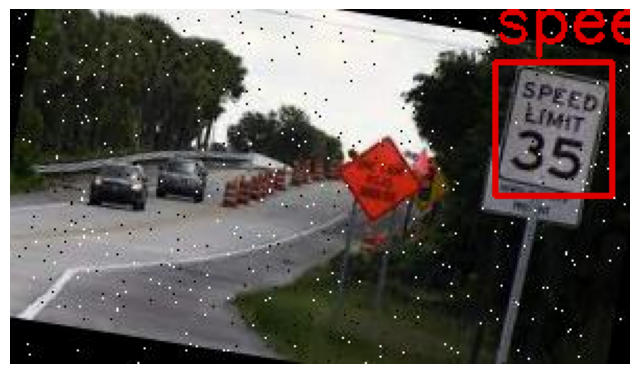


0: 384x640 2 speed signs, 10.5ms
Speed: 0.9ms preprocess, 10.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


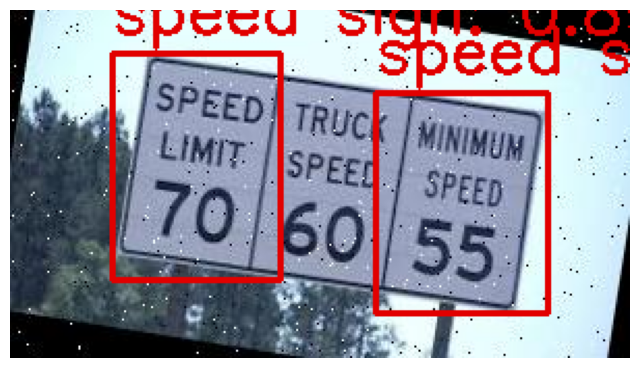


0: 640x640 1 speed sign, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


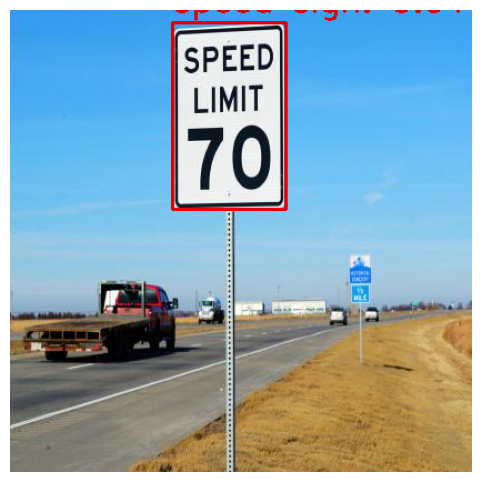


0: 480x640 1 speed sign, 16.5ms
Speed: 1.1ms preprocess, 16.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


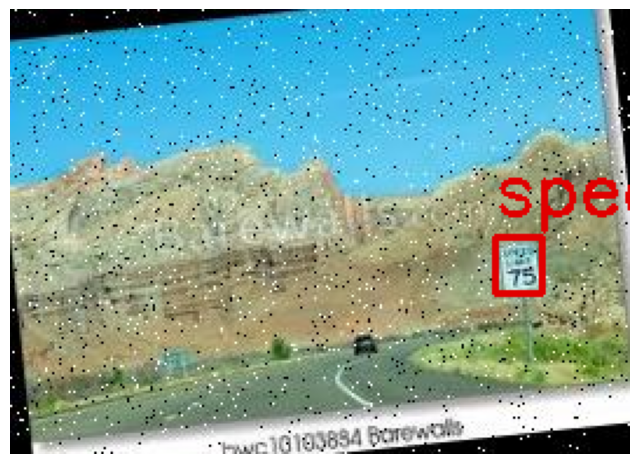


0: 480x640 1 speed sign, 10.3ms
Speed: 1.1ms preprocess, 10.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


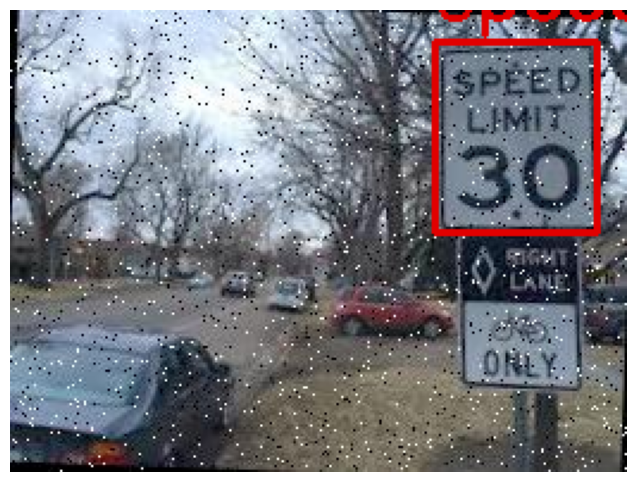


0: 640x544 1 speed sign, 113.5ms
Speed: 1.3ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


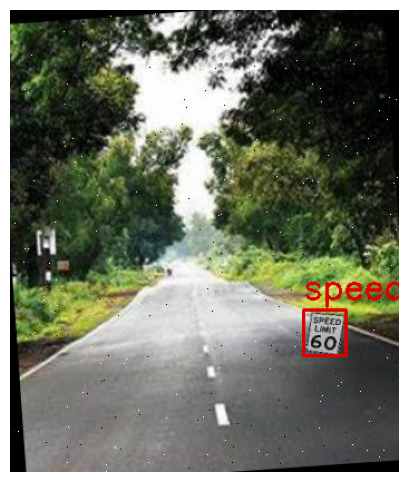


0: 384x640 1 speed sign, 11.5ms
Speed: 0.9ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


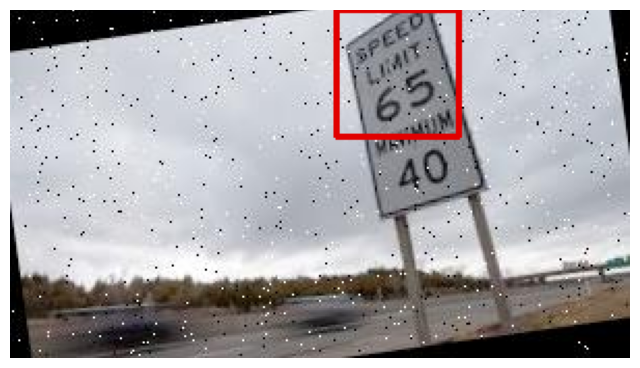

In [18]:
# Testing on test image
# test_dataset_dir = (
#     "/home/avalocal/Documents/yolov9_ros/src/yolov9ros/src/yolov9/cone_images"
# )
test_dataset_dir = '/media/avalocal/T9/harsha/datasets/speed_limit_data/test/images'
# Get the list of images in the test dataset directory
test_images = os.listdir(test_dataset_dir)

model = YOLO(
    '/home/avalocal/Documents/yolov9_ros/src/yolov9ros/src/yolov9/runs/detect/train14/weights/best.pt'
)
# model = YOLO(
#     "/home/avalocal/Documents/Sign-and-Cone-Detection/runs/detect/train14/weights/best.pt"
# )

# for image_name in test_images[0, len(test_images), 100]:
for img_id in range(0, len(test_images), 1):
    # Load the image
    image_path = os.path.join(test_dataset_dir, test_images[img_id])
    image = cv2.imread(image_path)
    image.shape
    detections = model(image)
    result = detections[0]
    class_id = result.boxes.cls.cpu().numpy()  # Class IDs
    confidence = result.boxes.conf.cpu().numpy()  # Confidence scores

    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")  # Bounding boxes
    for i, bbox in enumerate(bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(image, (x, y), (x2, y2), (0, 0, 225), 2)
        # label = f"car: {float('{:.2f}'.format(confidence[i]))}"
        label = f"{model.names[int(class_id[i])]}: {float('{:.2f}'.format(confidence[i]))}"
        cv2.putText(
            image,
            label,
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 0, 225),
            2,
        )

    # Convert BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()